# Introductory Tools Examples
This notebook contains short, self-contained examples that demonstrate basic usage of the selected tools (excluding Python, Jupyter, and GitHub):
- NumPy
- Pandas
- NetworkX
- Scikit-learn
- PyTorch
- Matplotlib
- Seaborn
- Open Graph Benchmark (OGB) — safe import example


In [9]:
# NumPy + Pandas: basic array -> DataFrame operations
import numpy as np
import pandas as pd

arr = np.arange(12).reshape(4,3)
print('NumPy array shape:', arr.shape)
df = pd.DataFrame(arr, columns=['A','B','C'])
print('Pandas DataFrame head:')
print(df.head())
print('Column means:')
print(df.mean())

NumPy array shape: (4, 3)
Pandas DataFrame head:
   A   B   C
0  0   1   2
1  3   4   5
2  6   7   8
3  9  10  11
Column means:
A    4.5
B    5.5
C    6.5
dtype: float64


In [10]:
# NetworkX: small directed graph and adjacency matrix
import networkx as nx
import numpy as np
G = nx.DiGraph()
G.add_edges_from([(0,1),(0,2),(1,2),(2,3),(3,4)])
print('Nodes:', G.nodes())
print('Edges:', G.edges())
adj = nx.to_numpy_array(G, dtype=int)
print('Adjacency matrix:', adj)

Nodes: [0, 1, 2, 3, 4]
Edges: [(0, 1), (0, 2), (1, 2), (2, 3), (3, 4)]
Adjacency matrix: [[0 1 1 0 0]
 [0 0 1 0 0]
 [0 0 0 1 0]
 [0 0 0 0 1]
 [0 0 0 0 0]]


In [11]:
# Scikit-learn: StandardScaler + PCA on random data
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
X = np.random.RandomState(0).randn(50,5)
scaler = StandardScaler()
Xs = scaler.fit_transform(X)
pca = PCA(n_components=2)
X2 = pca.fit_transform(Xs)
print('Scaled shape:', Xs.shape)
print('PCA output shape:', X2.shape)
print('Explained variance ratio:', pca.explained_variance_ratio_)

Scaled shape: (50, 5)
PCA output shape: (50, 2)
Explained variance ratio: [0.25475806 0.23597251]


In [12]:
# PyTorch: basic tensors and a tiny module (Linear)
import torch
import torch.nn as nn
x = torch.randn(4,3)
linear = nn.Linear(3,2)
y = linear(x)
print('Input shape:', x.shape)
print('Output shape:', y.shape)

# Optional: simple neighbor-aggregate (pseudo-GraphSAGE style)
def aggregate_neighbors(features, adj):
    # features: [N, F], adj: [N, N] (0/1)
    return torch.matmul(adj, features)

# small example
adj = torch.tensor([[0.,1.,1.,0.,0.], [0.,0.,1.,0.,0.], [0.,0.,0.,1.,0.], [0.,0.,0.,0.,1.], [0.,0.,0.,0.,0.]], dtype=torch.float32)
feat = torch.randn(5,3)
agg = aggregate_neighbors(feat, adj)
print('Aggregated shape:', agg.shape)

Input shape: torch.Size([4, 3])
Output shape: torch.Size([4, 2])
Aggregated shape: torch.Size([5, 3])


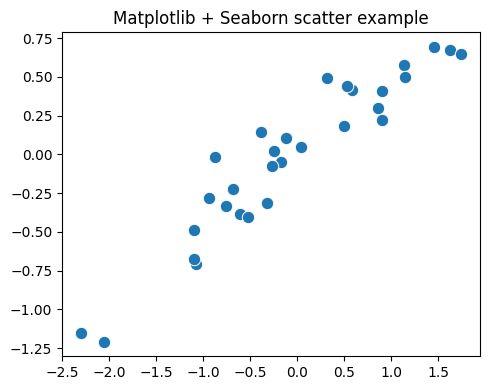

In [13]:
# Matplotlib & Seaborn: quick scatter plot (will display in notebooks)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
rng = np.random.RandomState(1)
x = rng.randn(30)
y = x * 0.5 + rng.randn(30) * 0.2
plt.figure(figsize=(5,4))
sns.scatterplot(x=x, y=y, s=80)
plt.title('Matplotlib + Seaborn scatter example')
plt.tight_layout()
plt.show()

In [14]:
# Open Graph Benchmark (OGB):
try:
    from ogb.nodeproppred import NodePropPredDataset
    print('OGB available: trying to load a small dataset (metadata only)')
    try:
        dataset = NodePropPredDataset(name='ogbn-arxiv')
        print('OGB dataset loaded (metadata):', dataset)
    except Exception as e:
        print('OGB import worked but dataset fetch failed (likely no internet or package data). Exception:', e)
except Exception as e:
    print('OGB is not installed in this environment')


OGB available: trying to load a small dataset (metadata only)
OGB import worked but dataset fetch failed (likely no internet or package data). Exception: Weights only load failed. In PyTorch 2.6, we changed the default value of the `weights_only` argument in `torch.load` from `False` to `True`. Re-running `torch.load` with `weights_only` set to `False` will likely succeed, but it can result in arbitrary code execution. Do it only if you got the file from a trusted source.
Please file an issue with the following so that we can make `weights_only=True` compatible with your use case: WeightsUnpickler error: Unsupported operand 149

Check the documentation of torch.load to learn more about types accepted by default with weights_only https://pytorch.org/docs/stable/generated/torch.load.html.
OGB import worked but dataset fetch failed (likely no internet or package data). Exception: Weights only load failed. In PyTorch 2.6, we changed the default value of the `weights_only` argument in `torc

c:\Users\maria\miniconda3\Lib\site-packages\torch\_weights_only_unpickler.py:549: UserWarning: Detected pickle protocol 4 in the checkpoint, which was not the default pickle protocol used by `torch.load` (2). The weights_only Unpickler might not support all instructions implemented by this protocol, please file an issue for adding support if you encounter this.
  warnings.warn(
